In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 1- Data Cleaning

In [2]:
weather = pd.read_csv('testset.csv')

In [4]:
weather.rename(columns={'datetime_utc': 'datetime(utc)', ' _conds': 'conditions', ' _dewptm': 'dewtemp', ' _fog': 'fog',
                        ' _hail': 'hail', ' _heatindexm': 'heatindex', ' _hum': 'humidity', ' _precipm': 'precipitation',
                        ' _pressurem': 'pressure', ' _rain': 'rain', ' _snow': 'snow', ' _tempm': 'temperature',
                        ' _thunder': 'thunder', ' _tornado': 'tornado', ' _vism': 'vism', ' _wdird': 'wdird',
                        ' _wdire': 'wdirection', ' _wgustm': 'wgustm', ' _windchillm': 'windchill', ' _wspdm': 'wspdm'}, inplace=True)


In [6]:
weather.columns

Index(['datetime(utc)', 'conditions', 'dewtemp', 'fog', 'hail', 'heatindex',
       'humidity', 'precipm', 'pressure', 'rain', 'snow', 'temperature',
       'thunder', 'tornado', 'vism', 'wdird', 'wdirection', 'wgustm',
       'windchill', 'wspdm'],
      dtype='object')

In [8]:
weather['precipm'].isnull().value_counts()
weather = weather.drop('precipm', axis=1)
weather.head()

,datetime(utc),conditions,dewtemp,fog,hail,heatindex,humidity,pressure,rain,snow,temperature,thunder,tornado,vism,wdird,wdirection,wgustm,windchill,wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


# 2- Plot Graph

In [9]:
weather['datetime(utc)'] = pd.to_datetime(weather['datetime(utc)'])
weather['Months'] = weather['datetime(utc)'].apply(lambda t:t.month)
weather['monthName'] = weather['Months'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [10]:
filtered = weather.drop(labels=['datetime(utc)', 'wdirection', 'conditions'], axis=1)
filtered = filtered.groupby(by='Months').mean()

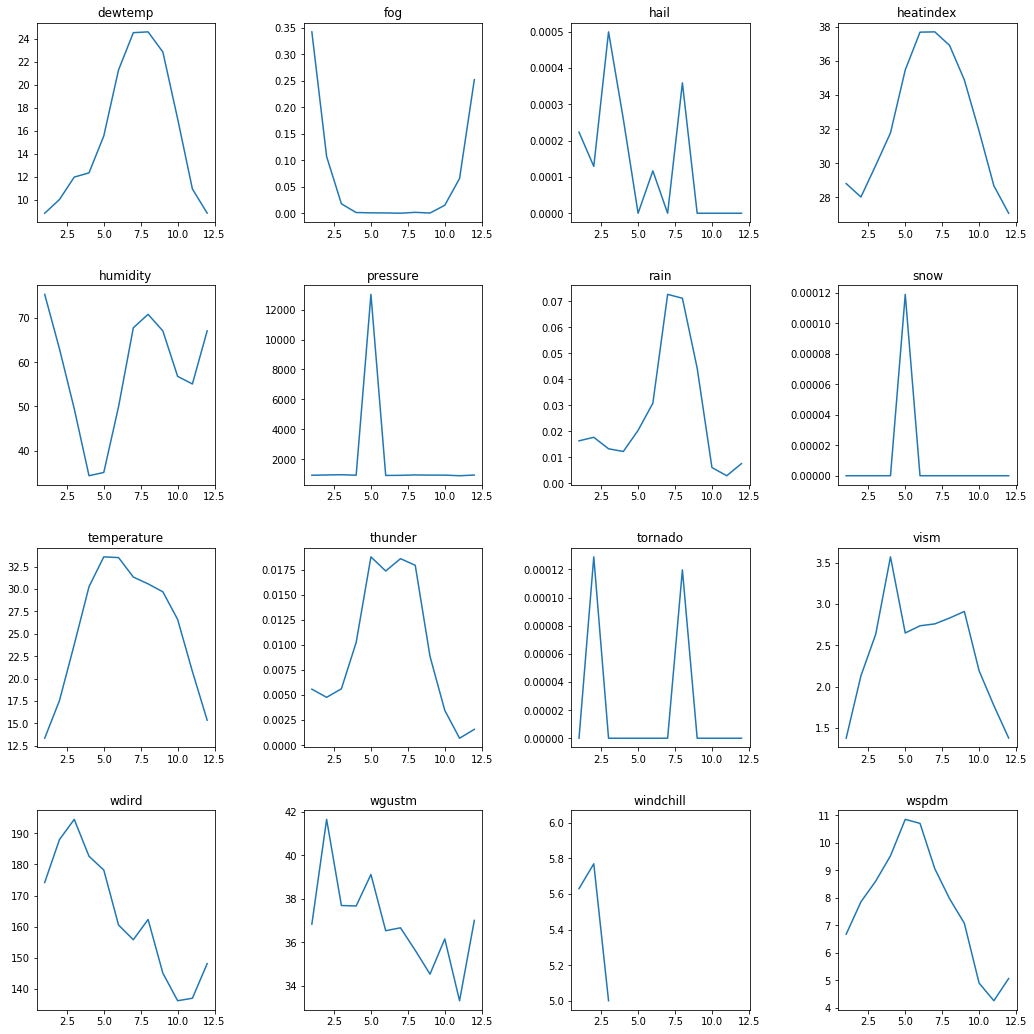

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,15))
l = ['dewtemp', 'fog', 'hail', 'heatindex', 'humidity', 'pressure', 'rain',
       'snow', 'temperature', 'thunder', 'tornado', 'vism', 'wdird', 'wgustm',
       'windchill', 'wspdm']
a=0

for i in range(4):
    for j in range(4):
        axes[i,j].plot(filtered[l[a]])
        axes[i,j].title.set_text(l[a])
        a+=1
plt.tight_layout(pad=3)

# 3-Plot Pie Chart

In [12]:
numCount = weather.groupby(by=['Months','conditions']).count()['monthName'].unstack()
d = numCount.dropna(axis=1)
d

conditions,Blowing Sand,Clear,Drizzle,Haze,Light Drizzle,Light Rain,Light Thunderstorms and Rain,Mist,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Scattered Clouds,Smoke,Thunderstorm,Thunderstorms and Rain,Unknown,Widespread Dust
Months,,,,,,,,,,,,,,,,,,
1,6.0,317.0,8.0,1212.0,29.0,57.0,18.0,1070.0,208.0,81.0,183.0,25.0,155.0,2439.0,3.0,26.0,28.0,10.0
2,12.0,438.0,5.0,2850.0,31.0,64.0,5.0,1106.0,75.0,17.0,168.0,24.0,94.0,1907.0,4.0,26.0,21.0,66.0
3,34.0,226.0,4.0,4703.0,15.0,45.0,2.0,843.0,60.0,9.0,144.0,10.0,95.0,1484.0,7.0,30.0,13.0,121.0
4,53.0,347.0,4.0,4998.0,15.0,30.0,13.0,102.0,117.0,5.0,239.0,9.0,252.0,864.0,27.0,30.0,37.0,532.0
5,73.0,972.0,4.0,4641.0,5.0,40.0,35.0,43.0,79.0,7.0,494.0,12.0,350.0,337.0,34.0,77.0,113.0,1058.0
6,132.0,324.0,7.0,5768.0,28.0,97.0,33.0,231.0,120.0,14.0,353.0,36.0,289.0,178.0,28.0,74.0,65.0,757.0
7,26.0,15.0,24.0,6119.0,82.0,351.0,23.0,815.0,231.0,56.0,161.0,105.0,282.0,42.0,41.0,87.0,5.0,95.0
8,4.0,7.0,30.0,5894.0,96.0,347.0,20.0,921.0,329.0,74.0,68.0,90.0,249.0,48.0,30.0,74.0,3.0,14.0
9,26.0,84.0,16.0,5940.0,76.0,216.0,9.0,895.0,191.0,27.0,148.0,55.0,240.0,332.0,13.0,42.0,6.0,13.0


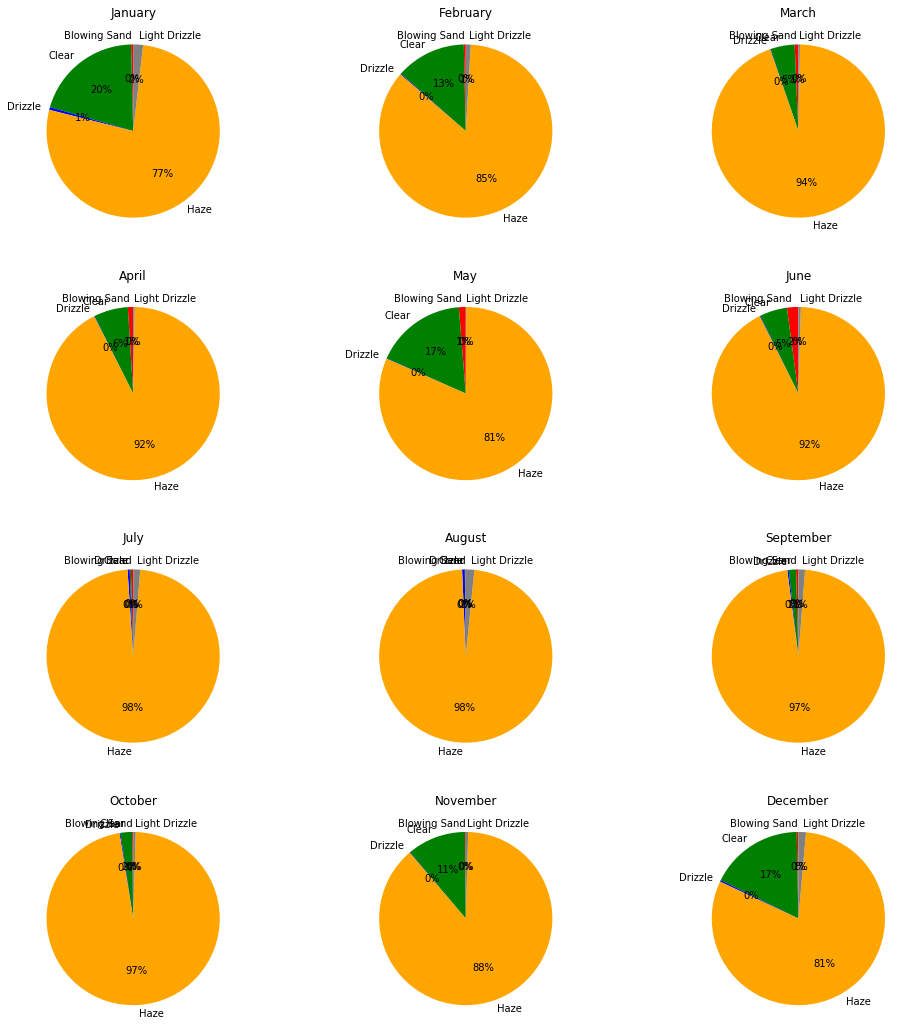

In [23]:
fig , axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
a=0
b = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November','December']
colors = ['r','g','b','#ffa500','gray']
for i in range(4):
    for j in range(3):
        temp = dict(d.iloc[a].head())
        lists = temp.items()
        activities, slices = zip(*lists)
        axes[i,j].pie(slices, labels=activities, colors=colors,autopct='%1.0f%%', startangle=90)
        axes[i,j].title.set_text(b[a])
        a+=1
plt.tight_layout(pad=3)